In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [44]:
df = yf.Ticker('BTC-USD').history(start="2021-05-12",  end="2021-11-12")
df = pd.DataFrame(df['Close'])
df

,Close
Date,
2021-05-11,56704.574219
2021-05-12,49150.535156
2021-05-13,49716.191406
2021-05-14,49880.535156
2021-05-15,46760.187500
...,...
2021-11-07,63326.988281
2021-11-08,67566.828125
2021-11-09,66971.828125


<AxesSubplot:xlabel='Date'>

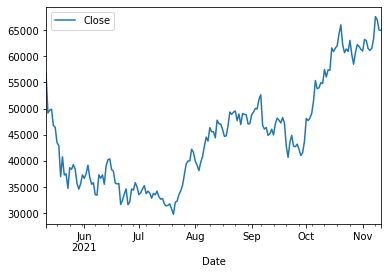

In [45]:
df.plot()

In [46]:
alpha = 0.2
df['EWMA'] = df['Close'].ewm(alpha = alpha, adjust = False).mean()

In [47]:
type(df['Close'].ewm(alpha = alpha, adjust = False))

pandas.core.window.ewm.ExponentialMovingWindow

<AxesSubplot:xlabel='Date'>

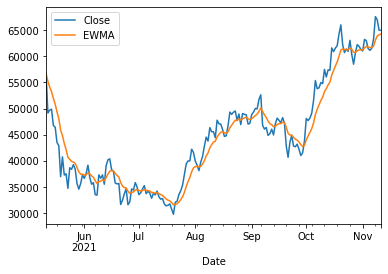

In [48]:
df.plot()

In [49]:
manual_ewma = []
for x in df['Close'].to_numpy():
    if len(manual_ewma) > 0:
        xhat = alpha * x + (1- alpha) * manual_ewma[-1]
    else: 
        xhat = x    
    manual_ewma.append(xhat)
df['Manual'] = manual_ewma

<AxesSubplot:xlabel='Date'>

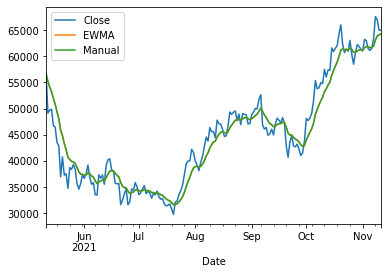

In [50]:
df.plot()

In [51]:
df

,Close,EWMA,Manual
Date,,,
2021-05-11,56704.574219,56704.574219,56704.574219
2021-05-12,49150.535156,55193.766406,55193.766406
2021-05-13,49716.191406,54098.251406,54098.251406
2021-05-14,49880.535156,53254.708156,53254.708156
2021-05-15,46760.187500,51955.804025,51955.804025
...,...,...,...
2021-11-07,63326.988281,61967.454301,61967.454301
2021-11-08,67566.828125,63087.329066,63087.329066
2021-11-09,66971.828125,63864.228878,63864.228878


In [52]:
df.drop('Manual',axis = 1, inplace =True)
# df.drop('EWMA',axis = 1, inplace =True)

In [53]:
#!pip install -U statsmodels

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# make the model - data is univariate
ses = SimpleExpSmoothing(df['Close'])

# 'fit' the model - returns a HoltWintersResults object
result = ses.fit(smoothing_level = alpha, optimized = False)

# in-sample prediction or out-of-sample forecast
# result.predict(start=start_date,end= end_date)
result.predict(start="2021-05-11",end= "2021-11-10")


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


2021-05-11    56704.574219
2021-05-12    56704.574219
2021-05-13    55193.766406
2021-05-14    54098.251406
2021-05-15    53254.708156
                  ...     
2021-11-06    61652.593390
2021-11-07    61627.570806
2021-11-08    61967.454301
2021-11-09    63087.329066
2021-11-10    63864.228878
Freq: D, Length: 184, dtype: float64

In [57]:
ses = SimpleExpSmoothing(df['Close'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [58]:
df.index

DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20',
               ...
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11'],
              dtype='datetime64[ns]', name='Date', length=185, freq=None)

In [59]:
df.index.freq = 'D'

In [60]:
df.index

DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20',
               ...
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11'],
              dtype='datetime64[ns]', name='Date', length=185, freq='D')

In [61]:
ses = SimpleExpSmoothing(df['Close'],
                        initialization_method = 'legacy-heuristic')

In [62]:
res = ses.fit(smoothing_level= alpha,optimized=False)

In [63]:
res

In [64]:
res.predict(start = df.index[0], end=df.index[-1])

Date
2021-05-11    56704.574219
2021-05-12    56704.574219
2021-05-13    55193.766406
2021-05-14    54098.251406
2021-05-15    53254.708156
                  ...     
2021-11-07    61627.570806
2021-11-08    61967.454301
2021-11-09    63087.329066
2021-11-10    63864.228878
2021-11-11    64090.429196
Freq: D, Length: 185, dtype: float64

In [65]:
df['SES'] = res.predict(start = df.index[0], end=df.index[-1])

In [66]:
# get all in-sample prediction
np.allclose(df['SES'], res.fittedvalues)

True

<AxesSubplot:xlabel='Date'>

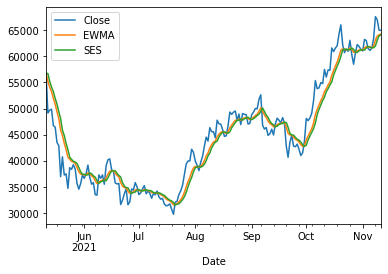

In [67]:
df.plot()

In [68]:
df.head()

,Close,EWMA,SES
Date,,,
2021-05-11,56704.574219,56704.574219,56704.574219
2021-05-12,49150.535156,55193.766406,56704.574219
2021-05-13,49716.191406,54098.251406,55193.766406
2021-05-14,49880.535156,53254.708156,54098.251406
2021-05-15,46760.187500,51955.804025,53254.708156


In [69]:
df['SES-1'] = df['SES'].shift(-1)

<AxesSubplot:xlabel='Date'>

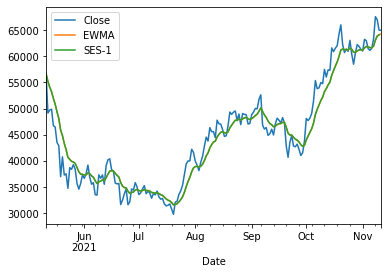

In [70]:
### No!
df[['Close','EWMA','SES-1']].plot()

In [71]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[N_test:]

In [72]:
ses = SimpleExpSmoothing(
    train['Close'],
    initialization_method = 'legacy-heuristic')
res =ses.fit()

In [73]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

<AxesSubplot:xlabel='Date'>

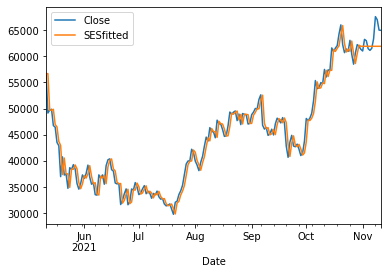

In [74]:
df.loc[train_idx,'SESfitted'] = res.fittedvalues
df.loc[test_idx,'SESfitted'] = res.forecast(N_test)
df[['Close','SESfitted']].plot()

In [75]:
res.params

{'smoothing_level': 0.9333372078122095,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 56592.57421875,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
from statsmodels.tsa.holtwinters import Holt

In [77]:
holt = Holt(df['Close'], initialization_method = 'legacy-heuristic')

In [78]:
res_h=holt.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [79]:
df['Holt'] = res_h.fittedvalues

<AxesSubplot:xlabel='Date'>

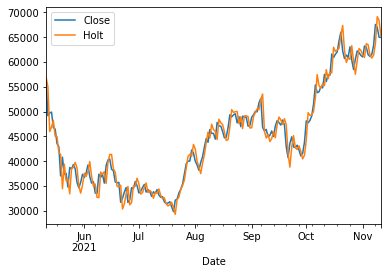

In [80]:
df[['Close','Holt']].plot()

<AxesSubplot:xlabel='Date'>

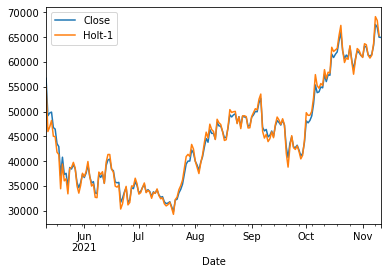

In [81]:
### No!
df['Holt-1'] = df['Holt'].shift(-1)
df[['Close','Holt-1']].plot()

In [82]:
holt = Holt(train['Close'], initialization_method = 'legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [84]:
df.loc[test_idx,'Holt'] = res_h.forecast(N_test)

<AxesSubplot:xlabel='Date'>

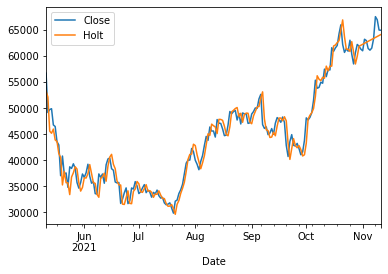

In [85]:
df[['Close','Holt']].plot()

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [93]:
hw = ExponentialSmoothing(
    train['Close'],
    initialization_method = 'legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods =12)
res_hw = hw.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues

In [95]:
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)

<AxesSubplot:xlabel='Date'>

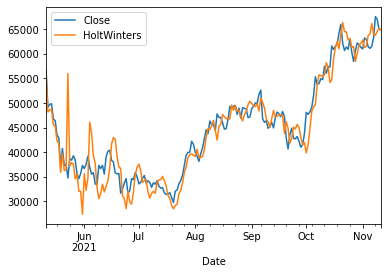

In [96]:
df[['Close','HoltWinters']].plot()

In [97]:
def rmse (y, t):
    return np.sqrt(np.mean(y-t)**2)

In [98]:
def mae (y, t):
    return np.mean(np.abs(y-t))

In [103]:
print("Train RMSE:", rmse(train['Close'],res_hw.fittedvalues))
print("Train RMSE:", rmse(test['Close'],res_hw.forecast(N_test)))

Train RMSE: 408.65606279742843
Train RMSE: 308.3087517193356


In [104]:
print("Train MAE:", mae(train['Close'],res_hw.fittedvalues))
print("Train MAE:", mae(test['Close'],res_hw.forecast(N_test)))

Train MAE: 2307.0813676982552
Train MAE: 1917.1677902639155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Date'>

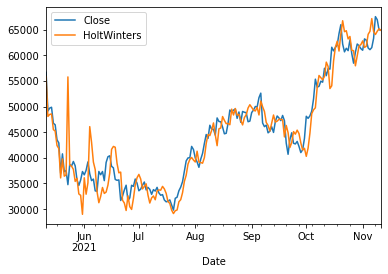

In [106]:
hw = ExponentialSmoothing(
    train['Close'],
    initialization_method = 'legacy-heuristic',
    trend = 'add', seasonal = 'mul', seasonal_periods = 12)
res_hw = hw.fit()
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)
df[['Close', 'HoltWinters']].plot()

In [107]:
print("Train RMSE:", rmse(train['Close'],res_hw.fittedvalues))
print("Train RMSE:", rmse(test['Close'],res_hw.forecast(N_test)))

Train RMSE: 321.8294434407555
Train RMSE: 617.5446115635241


In [108]:
print("Train MAE:", mae(train['Close'],res_hw.fittedvalues))
print("Train MAE:", mae(test['Close'],res_hw.forecast(N_test)))

Train MAE: 2186.5617297560357
Train MAE: 2057.81481918691


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Date'>

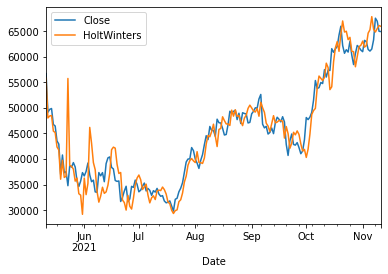

In [109]:
hw = ExponentialSmoothing(
    train['Close'],
    initialization_method = 'legacy-heuristic',
    trend = 'mul', seasonal = 'mul', seasonal_periods = 12)
res_hw = hw.fit()
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)
df[['Close', 'HoltWinters']].plot()

In [110]:
print("Train RMSE:", rmse(train['Close'],res_hw.fittedvalues))
print("Train RMSE:", rmse(test['Close'],res_hw.forecast(N_test)))

Train RMSE: 210.48855645629783
Train RMSE: 1226.1455495332314


In [111]:
print("Train MAE:", mae(train['Close'],res_hw.fittedvalues))
print("Train MAE:", mae(test['Close'],res_hw.forecast(N_test)))

Train MAE: 2168.68515578134
Train MAE: 2261.139036976394
